Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

Instrucciones:

In [ ]:
# !pip install scipy

In [17]:
import pandas as pd
import numpy as np
from itertools import combinations

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

pd.set_option('display.float_format', '{:.2f}'.format) #para formaterar los numeros a 2 decimales
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [18]:
df_pair8 = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media

- Mediana

- Desviación estándar

- Mínimo

- Máximo

In [19]:
numericas = df_pair8.select_dtypes(include = np.number).columns

df_pair8[numericas].mean()



density                                         134.50
agricultural_land                                39.12
land_area                                       255.21
armed_forces_size                               103.78
birth_rate                                       20.21
calling_code                                    360.55
co2-emissions                                   125.92
cpi                                             144.19
cpi_change                                        6.72
fertility_rate                                    2.70
forested_area                                    32.02
gasoline_price                                    1.00
gdp                                    477295901399.54
gross_primary_education_enrollment              102.47
gross_tertiary_education_enrollment              37.96
infant_mortality                                 21.33
life_expectancy                                  72.28
maternal_mortality_ratio                        160.39
minimum_wa

In [20]:
df_pair8[numericas].median()

density                                         83.00
agricultural_land                               39.60
land_area                                      148.46
armed_forces_size                               28.50
birth_rate                                      17.95
calling_code                                   255.50
co2-emissions                                   34.48
cpi                                            124.74
cpi_change                                       2.30
fertility_rate                                   2.25
forested_area                                   32.00
gasoline_price                                   0.98
gdp                                    34387229486.00
gross_primary_education_enrollment             102.55
gross_tertiary_education_enrollment             31.20
infant_mortality                                14.00
life_expectancy                                 73.20
maternal_mortality_ratio                        53.00
minimum_wage                

In [21]:
df_pair8[numericas].std()

density                                          157.31
agricultural_land                                 21.78
land_area                                        258.39
armed_forces_size                                167.16
birth_rate                                         9.95
calling_code                                     323.24
co2-emissions                                    181.79
cpi                                               54.78
cpi_change                                        24.45
fertility_rate                                     1.28
forested_area                                     23.79
gasoline_price                                     0.37
gdp                                    2172173359474.05
gross_primary_education_enrollment                13.15
gross_tertiary_education_enrollment               29.26
infant_mortality                                  19.55
life_expectancy                                    7.48
maternal_mortality_ratio                        

In [22]:
df_pair8[numericas].min()

density                                       1.26
agricultural_land                             0.60
land_area                                     0.00
armed_forces_size                             0.00
birth_rate                                    5.90
calling_code                                  1.00
co2-emissions                                 1.02
cpi                                          99.03
cpi_change                                   -4.30
fertility_rate                                0.98
forested_area                                 0.00
gasoline_price                                0.00
gdp                                    47271463.00
gross_primary_education_enrollment           23.40
gross_tertiary_education_enrollment           0.80
infant_mortality                              1.40
life_expectancy                              52.80
maternal_mortality_ratio                      2.00
minimum_wage                                  0.01
out_of_pocket_health_expenditur

In [23]:
df_pair8[numericas].max()

density                                           847.00
agricultural_land                                  82.60
land_area                                         964.00
armed_forces_size                                 936.00
birth_rate                                         46.08
calling_code                                     1876.00
co2-emissions                                     727.97
cpi                                               550.93
cpi_change                                        254.90
fertility_rate                                      6.91
forested_area                                      98.30
gasoline_price                                      2.00
gdp                                    21427700000000.00
gross_primary_education_enrollment                142.50
gross_tertiary_education_enrollment               136.60
infant_mortality                                   84.50
life_expectancy                                    85.40
maternal_mortality_ratio       

In [ ]:
## obtenemos las estadisticas descriptivas de las variables numericas solicitadas, en general destaca la columna gdp ya que es mucho mas alta que las demas
## hay algunas variables como calling code que aunque sean numericas no tiene sentido hacer operaciones con ellas

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [27]:
pais_mayor_densidad = df_pair8.loc[df_pair8["density"].idxmax()]["country"]
pais_mayor_densidad

'Palestinian National Authority'

In [28]:
pais_menor_poblacion = df_pair8.loc[df_pair8["urban_population"].idxmin()]["country"]
pais_menor_poblacion

'Liechtenstein'

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [30]:
tasa_natalidad_promedio = df_pair8["birth_rate"].mean()
tasa_natalidad_promedio

20.21497354497354

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [40]:
def clasificacion_mortalidad (valor):

    if valor < 6.0:
        return "Baja"
    elif 6.0 < valor < 14.0:
        return "Moderada"
    else:
        return "Alta"

df_pair8["clasification_infant_mortality"] = df_pair8["infant_mortality"].apply(clasificacion_mortalidad)

In [31]:
df_pair8["infant_mortality"].describe()

count   189.00
mean     21.33
std      19.55
min       1.40
25%       6.00
50%      14.00
75%      32.70
max      84.50
Name: infant_mortality, dtype: float64

In [35]:
percentiles = np.nanpercentile(df_pair8["infant_mortality"], [25, 50, 75])

In [36]:
percentiles[0]

6.0

In [39]:
percentiles[1]

14.0

In [38]:
percentiles[2]

32.7

In [41]:
df_pair8.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,clasification_infant_mortality
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia,Alta
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe,Moderada
2,Algeria,18.00,DZ,17.40,NaN,317.00,24.28,213.00,Algiers,150.01,151.36,2.00,DZD,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,Algiers,76.70,112.00,0.95,Arabic,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66,Africa,Alta
3,Andorra,164.00,AD,40.00,468.00,NaN,7.20,376.00,Andorra la Vella,469.00,NaN,NaN,EUR,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,Andorra la Vella,NaN,NaN,6.63,Catalan,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52,Europe,Baja
4,Angola,26.00,AO,47.50,NaN,117.00,40.73,244.00,Luanda,34.69,261.73,17.10,AOA,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,Luanda,60.80,241.00,0.71,Portuguese,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87,Africa,Alta


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [42]:
correlacion_fertility = df_pair8["fertility_rate"].corr(df_pair8["life_expectancy"])
correlacion_fertility

-0.8491528107360005

In [ ]:
# una correlacion de -0.8 indica una relacion negativa fuerte, es decir cuando una aumenta la otra disminuye.
# Podemos concluir que en paises mas desarrollados, es decir, con una mayor esperanza de vida, el promedio de hijos nacidos por mujer es menor que en paises subdesarrollados.

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

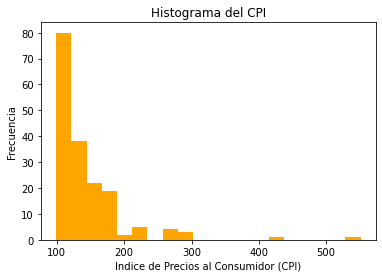

In [46]:
plt.hist(df_pair8["cpi"], color = "orange", bins = 20)
plt.title("Histograma del CPI")
plt.xlabel("Indice de Precios al Consumidor (CPI)")
plt.ylabel("Frecuencia");

In [ ]:
# Explicación: la mayoria de paises tienen un IPC de entre 100 y 200. Lo cual indica que los niveles de precios se mantienen relativamente estables, es decir, los precios han aumentado en un rango moderado.

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [47]:
df_pair8["Diferencia_gdp_co2"] = df_pair8["gdp"]-df_pair8["co2-emissions"]

In [49]:
pais_mayor_dif = df_pair8.loc[df_pair8["Diferencia_gdp_co2"].idxmax()]["country"]
pais_mayor_dif

'Germany'

In [50]:
# Explicacion: el pais con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono) es Alemania

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral  (population_labor_force_participation) para todos los países.

In [51]:
porcentaje_participacion = df_pair8["population_labor_force_participation"].mean()
porcentaje_participacion

62.73806818181817

In [ ]:
#Explicacion: el porcentaje promedio de personas que participan en la fuerza laboral para el conjunto de los países es de 62,73%

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [52]:
numericas2 = df_pair8.select_dtypes(include = np.number).columns

correlation_matrix = df_pair8[numericas2].corr()
correlation_matrix

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,Diferencia_gdp_co2
density,1.00,0.14,-0.15,0.11,-0.14,-0.03,0.10,-0.07,-0.11,-0.13,-0.04,0.15,0.02,0.07,-0.02,-0.10,0.14,-0.10,0.15,-0.02,0.00,-0.41,-0.03,0.11,0.08,-0.13,-0.29,0.04,0.11,0.10
agricultural_land,0.14,1.00,0.01,-0.01,0.20,-0.07,0.04,0.19,-0.01,0.18,-0.43,0.05,0.05,-0.05,-0.11,0.21,-0.24,0.21,-0.03,0.14,-0.04,0.03,-0.11,-0.06,0.17,0.06,0.09,-0.03,-0.02,0.06
land_area,-0.15,0.01,1.00,0.36,0.24,-0.21,0.10,0.19,0.27,0.24,-0.01,-0.17,0.11,-0.03,-0.11,0.26,-0.22,0.21,-0.09,0.07,-0.27,-0.47,0.02,-0.21,0.02,0.11,-0.51,-0.23,-0.02,0.10
armed_forces_size,0.11,-0.01,0.36,1.00,-0.11,-0.25,0.38,0.26,0.16,-0.12,-0.05,-0.21,0.37,0.03,0.13,-0.07,0.12,-0.11,0.02,0.22,-0.05,0.64,-0.18,-0.16,0.16,0.01,0.42,0.06,0.18,0.41
birth_rate,-0.14,0.20,0.24,-0.11,1.00,0.07,-0.09,0.28,0.11,0.98,-0.07,-0.20,-0.18,-0.08,-0.73,0.87,-0.87,0.77,-0.50,0.26,-0.74,0.26,0.17,-0.38,0.20,-0.04,0.13,-0.50,0.04,-0.32
calling_code,-0.03,-0.07,-0.21,-0.25,0.07,1.00,-0.25,-0.04,-0.08,0.03,-0.10,-0.19,-0.18,-0.04,-0.22,-0.03,-0.03,-0.13,-0.19,0.01,-0.04,0.17,0.05,-0.05,-0.24,-0.12,-0.12,0.01,0.19,-0.29
co2-emissions,0.10,0.04,0.10,0.38,-0.09,-0.25,1.00,0.07,-0.00,-0.08,0.00,0.08,0.48,-0.10,0.08,-0.09,0.08,-0.05,0.28,-0.17,-0.03,-0.17,-0.08,-0.02,0.09,0.08,-0.23,0.00,0.00,0.48
cpi,-0.07,0.19,0.19,0.26,0.28,-0.04,0.07,1.00,0.64,0.23,-0.09,-0.20,-0.06,0.19,-0.19,0.26,-0.29,0.22,-0.26,0.11,-0.22,0.19,-0.03,-0.24,0.06,0.06,0.13,-0.17,0.05,-0.07
cpi_change,-0.11,-0.01,0.27,0.16,0.11,-0.08,-0.00,0.64,1.00,0.10,0.02,-0.28,-0.01,-0.16,0.07,0.16,-0.15,0.23,-0.10,0.14,-0.04,0.06,-0.02,-0.24,0.12,0.11,0.04,-0.09,-0.08,-0.01
fertility_rate,-0.13,0.18,0.24,-0.12,0.98,0.03,-0.08,0.23,0.10,1.00,-0.06,-0.13,-0.16,-0.14,-0.68,0.85,-0.85,0.78,-0.43,0.20,-0.68,0.11,0.16,-0.37,0.21,-0.07,0.03,-0.46,0.03,-0.29


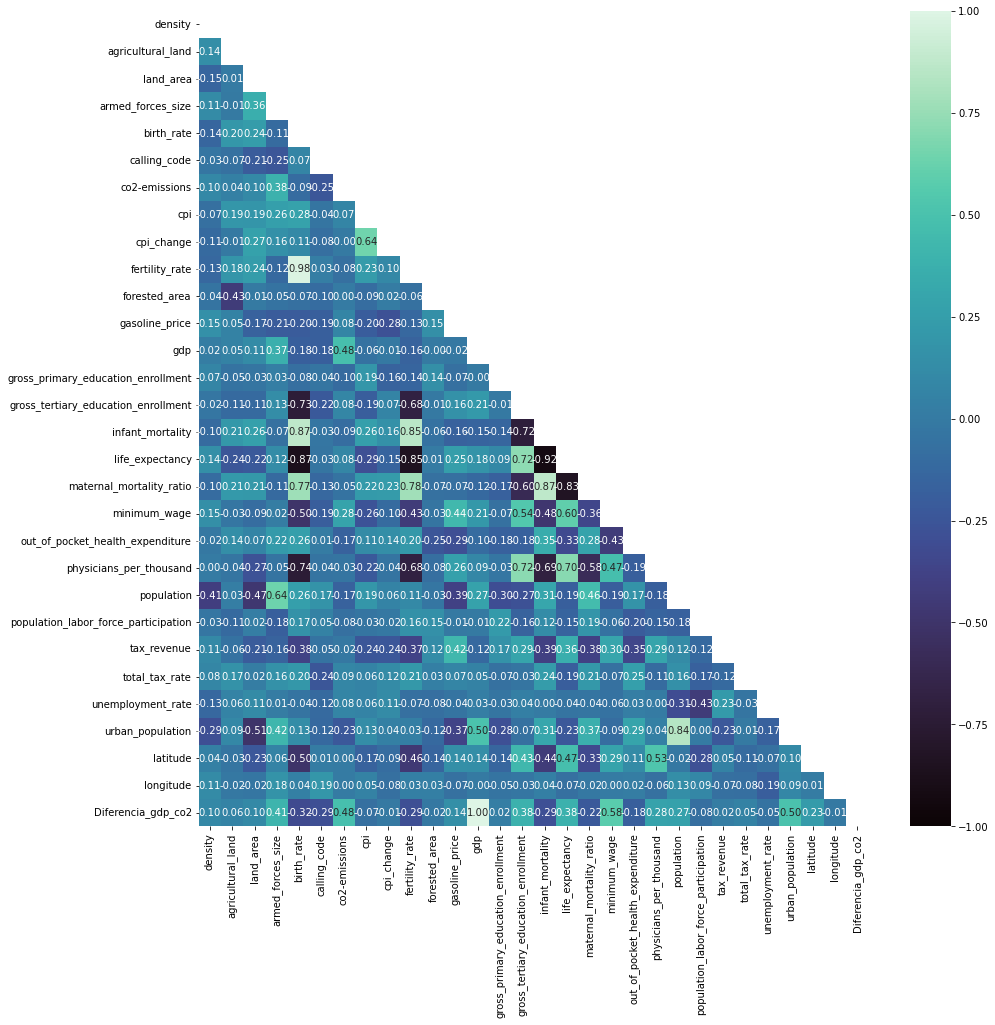

In [53]:
plt.figure(figsize = (15, 15))


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


sns.heatmap(correlation_matrix, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [ ]:
#Explicacion :  podemos observar que sobre todo la variable life_expectancy tiene 3 relaciones muy fuertes con birth_rate, fertility_rate, infant_mortality